<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/SGD_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SGD Assignment***

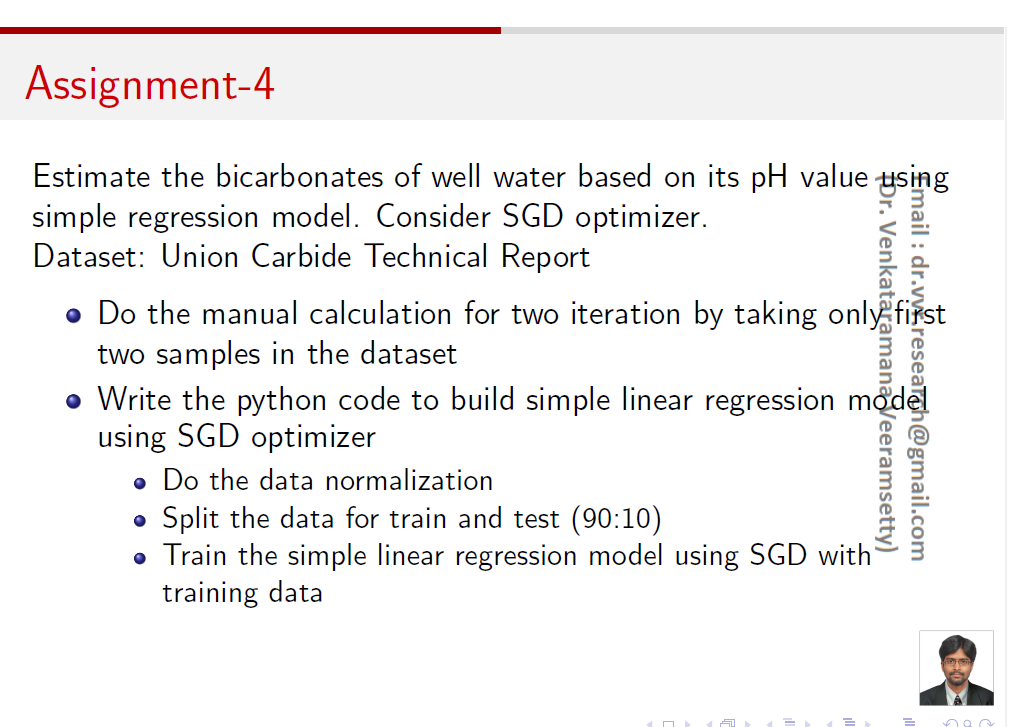

Dataset: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

**Import Libraries**

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd

***Load Data***

In [11]:
data = pd.read_csv('/content/SGD-Assignment.csv')
data.head()

,Ph,Bicarbonates
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


***Find Min and Max Values***

In [25]:
Ph_min=data['Ph'].min()
Ph_max=data['Ph'].max()
Bicarbonates_min=data['Bicarbonates'].min()
Bicarbonates_max=data['Bicarbonates'].max()

***Data Normalization***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

**Covert 2D array Into Dataframe**

In [13]:
import pandas as pd
data_norm=pd.DataFrame(data_norm,columns=['Ph','Bicarbo'])
data_norm.head()

,Ph,Bicarbo
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


**Data Split**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.Ph, data_norm.Bicarbo, test_size = 0.10, random_state = 10)

In [ ]:
x_train

**Model Parameter Initialization**

In [16]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000

***Gradient Function***

In [17]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

**SGD Optimization - Training**

In [18]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c
print('model parameter m and c',m,c)

model parameter m and c -0.24265760666929886 0.7891381221272105


***Training MSE***

In [35]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error

2.7699059043203333

**Testin MSE**

In [37]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error

0.41796295773201353

***Model Deployment***

In [26]:
X=input('enter X value')
print('X=',X)
X_norm=(float(X)-Ph_min)/(Ph_max-Ph_min)
print('X_norm=',X_norm)
Y_norm=m*float(X_norm)+c
Y=Y_norm*(Bicarbonates_max-Bicarbonates_max)+Bicarbonates_min
print('Y=',Y)

enter X value6.8
X= 6.8
X_norm= 0.047619047619047436
Y= 35.0


# Thank You